In [1]:
import matplotlib.pyplot as plt

def print_graph(predicted, x_train, y_train):


    predictions = []
    for prediction in predicted:
            predictions.append(prediction.argmax())

    labels = []
    for y in y_train:
            labels.append(y.argmax())

    column_a = []
    for x in x_train:
        column_a.append(x[1])

    plt.plot(column_a, labels, 'go', label='True data', alpha=0.2)
    plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)
    plt.legend(loc='best')
    plt.show()

### Set up dataset

In [2]:
import numpy

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    numpy.random.seed (1)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [7]:
import torch
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

# Bring in model from shared helper lib
from helper_libs.shared.models.LogisticRegression import LogisticRegression


iris = load_iris()


encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()

x_train, y_train = unison_shuffled_copies(x_train, y_train)

data_federation = [[x_train[0:64], y_train[0:64]], [x_train[65:129], y_train[65:129]]]

x_test = x_train[130:149]
y_test = y_train[130:149]

in_layer = len(x_train[0])
out_layer = len(y_train[0])
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LogisticRegression(in_layer, out_layer)
learn_rate = 0.1
epochs=5000
federal_epochs=2

In [8]:
from sail_safe_functions_orchestrator.machine_learning.federated_averaging import federated_averaging

model = federated_averaging(epochs, federal_epochs, data_federation, learn_rate, starting_model, criterion, optimizer)

### Model Before and After

/tmp/ipykernel_7543/514534770.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


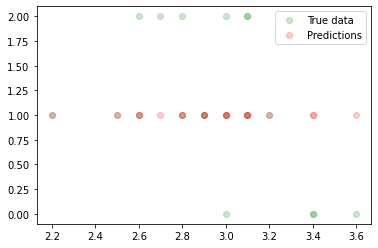

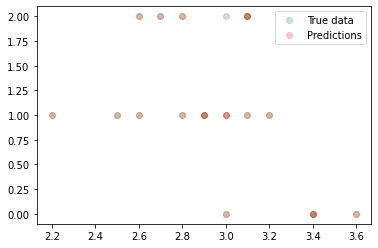

In [9]:
predicted = starting_model(x_test)
print_graph(predicted, x_test, y_test)

predicted = model(x_test)
print_graph(predicted, x_test, y_test)